In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv',index_col="PassengerId")
test_data= pd.read_csv('/kaggle/input/titanic/test.csv',index_col="PassengerId")
test_dataY= pd.read_csv('/kaggle/input/titanic/gender_submission.csv',index_col="PassengerId")

df_train = train_data.copy()
df_test  = test_data.copy()
df_testY  = test_dataY.copy()
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Train Data Shape: ",df_train.shape, 
      "\nTest DataX Shape: ",df_test.shape,
      "\nTest DataY: ",df_testY.shape)

Train Data Shape:  (891, 11) 
Test DataX Shape:  (418, 10) 
Test DataY:  (418, 1)


In [5]:
df_train.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.drop(['Name','Cabin','Ticket',"Fare"], axis=1, inplace=True )

df_test.drop(['Name','Cabin','Ticket',"Fare"], axis=1, inplace=True )

In [8]:
print("df_train: ",df_train.columns,"\ndf_Test:  ",df_test.columns)


df_train:  Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object') 
df_Test:   Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [9]:
df_train.Survived.unique()

array([0, 1])

In [10]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64



Check for Null Values in **df_train**

In [11]:
df_train.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [12]:
mean_train = df_train['Age'].mean()
mean_train

29.69911764705882

In [13]:
df_train["Age"] = df_train["Age"].fillna(mean_train)

In [14]:
df_train["Age"].isnull().sum()

0

Check null values in **df_test**


In [15]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [16]:
mean_test = df_test['Age'].mean()
mean_test


30.272590361445783

In [17]:
df_test["Age"] = df_test["Age"].fillna(mean_test)

In [18]:
df_test['Age'].isnull().sum()

0

Correlation 

In [19]:
def correlation_heatmap(df_train):
    correlations = df_train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

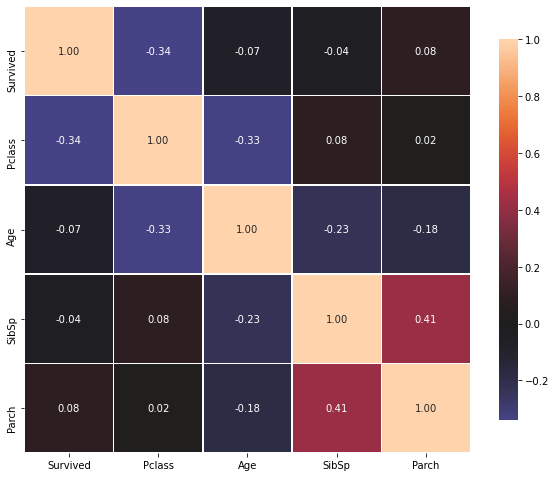

In [20]:
correlation_heatmap(df_train)

In [21]:
df_train[['Survived', 'Embarked']].groupby('Embarked').sum()


,Survived
Embarked,
C,93
Q,30
S,217


In [22]:
df_train[['Survived', 'Sex']].groupby('Sex').sum()

,Survived
Sex,
female,233
male,109


In [23]:
import seaborn as sns

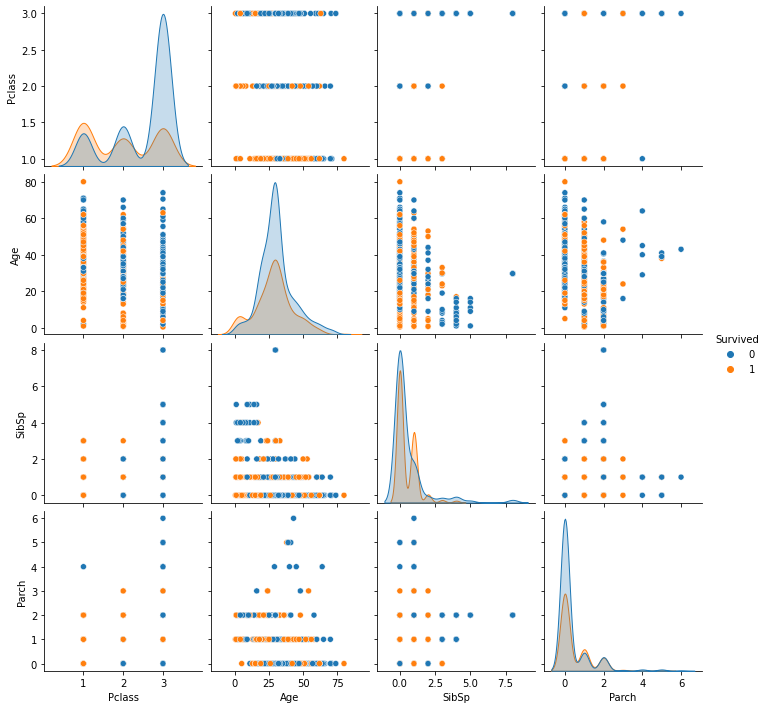

In [24]:
sns.pairplot(df_train, hue='Survived')

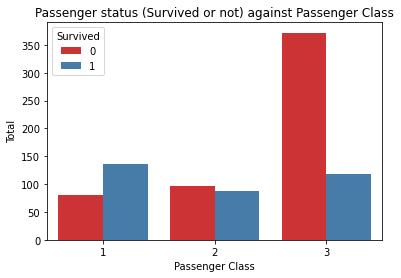

In [25]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Passenger status (Survived or not) against Passenger Class', 
       xlabel = 'Passenger Class',
       ylabel = 'Total')
plt.show()

Survived    0    1
Sex               
female     81  233
male      468  109


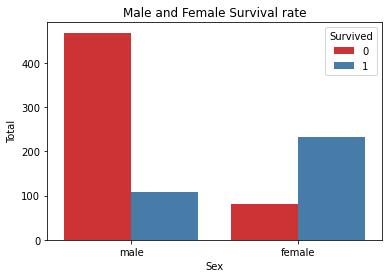

In [26]:
print(pd.crosstab(df_train["Sex"],df_train.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Male and Female Survival rate', xlabel = 'Sex', ylabel='Total')
plt.show()

In [27]:
# intervals = (0,18,35,60,120)
# categories = ['Children','Teens','Adult', 'Old']
# df_train['Age'] = pd.cut(df_train.Age, intervals, labels = categories)

# ax = sns.countplot(x = 'Age',  data = df_train, hue = 'Survived', palette = 'Set1')

# ax.set(xlabel='Age Categorical', ylabel='Total',
#        title="Age Categorical Survival Distribution")

# plt.show()

Feature Encoding

In [28]:
#from sklearn import preprocessing

#label_encoder = preprocessing.LabelEncoder()

Another way to encode catagorical values

In [29]:
X = df_train.drop("Survived", axis=1)
y = df_train['Survived']

In [30]:
catag_X = X.select_dtypes(exclude=['int64','float64']).columns
catag_X

Index(['Sex', 'Embarked'], dtype='object')

In [31]:
for i in catag_X:
    X[i]=pd.factorize(X[i])[0]
    df_test[i]=pd.factorize(df_test[i])[0]

In [32]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,0,22.0,1,0,0
2,1,1,38.0,1,0,1
3,3,1,26.0,0,0,0
4,1,1,35.0,1,0,0
5,3,0,35.0,0,0,0


In [33]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,0,34.5,0,0,0
893,3,1,47.0,1,0,1
894,2,0,62.0,0,0,0
895,3,0,27.0,0,0,1
896,3,1,22.0,1,1,1


In [34]:
print("X.shape: ",X.shape,"\t y.shape: ",y.shape, "\t df_test.shape: ",df_test.shape)

X.shape:  (891, 6) 	 y.shape:  (891,) 	 df_test.shape:  (418, 6)


KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
knn = KNeighborsClassifier()

Find Optimal value for k by elbow method.

In [37]:
# rmse_val = [] #to store rmse values for different k
# for K in range(1,40):
    
#     model =KNeighborsClassifier(n_neighbors = K)

#     model.fit(X, y)  #fit the model
#     pred=model.predict(df_test) #make prediction on test set
#     error = sqrt(mean_squared_error(df_testY,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

In [38]:
# #plotting the rmse values against k values
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot()

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X, y)

KNeighborsClassifier()

In [41]:
pred = knn.predict(df_test)
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [42]:
accuracy_score(df_testY, pred)*100

74.4019138755981

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
print(classification_report(df_testY,pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       266
           1       0.66      0.62      0.64       152

    accuracy                           0.74       418
   macro avg       0.72      0.72      0.72       418
weighted avg       0.74      0.74      0.74       418



SVM Classifier

In [45]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X, y)

y_pred = clf.predict(df_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(df_testY, y_pred)*100)